#### En este notebook se encuentra los codigos que se aplicaron en todos los tanques, utilizando unicamente al tanque de referencia como ejemplo

# Tanque General o Referencia H = 90 y D = 210

In [17]:
#Librerias utilizadas

from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
from sympy import *
from sympy.plotting import plot
from sympy.abc import z
init_printing()

#### La siguiente casilla contiene: 

1) Se carga el archivo de todas las particulas para el tanque de referencia H = 90 y = 210

2) Se realizá distinción del $ {\color{Green}valle} $ y de la joroba del ${\color{Red}muon}$

3) Se grafica en escala logritmica

c:\users\hmpv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


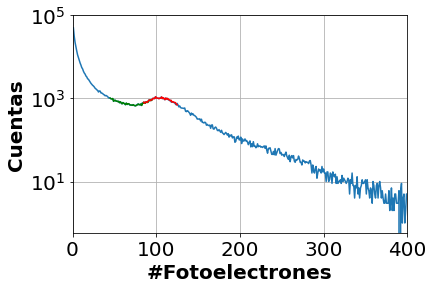

In [18]:
dataall90x210 = np.loadtxt('C:/Users/hmpv/Desktop/Resultados/ResultadosyGeometrias/TanqueGeneral/CerenGenElectAll.dat')

x = np.linspace(0, 500, 501)
x2 = np.linspace(45, 95, 50)
x3 = np.linspace(85, 125, 40)

plt.plot(x[1:], dataall90x210[1:501]) 
plt.plot(x2, dataall90x210[45:95],"g-")
plt.plot(x3, dataall90x210[85:125],"r-")
plt.ylabel("Cuentas", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.xlim(0,400)
plt.yscale('log')
plt.ylim(0,100000)
plt.grid()
#plt.savefig("TanqueGeneral90x210[ver1].jpg", dpi=300, bbox_inches='tight')
plt.show()

#### A continuación:

se aplica un ajuste al  $ {\color{Green}valle} $ y a la joroba del ${\color{Red}muon}$ por medio de un polinomio de grado 2

\begin{equation}
Y = Ax^{2} + Bx + C
\end{equation}

Por medio del curve_fit obtenemos las constantes:

In [19]:
def funcion(x, a, b, c):
    return a*pow(x,2)+b*x+c


x4 = np.linspace(45, 95, 50)
x5 = np.linspace(85, 125, 40)
#print(a3)
p1=[1, 1, 1]
popt, pcov = curve_fit(funcion, x4, dataall90x210[45:95], p0=p1)
#print(popt)
popt2, pcov2 = curve_fit(funcion, x5, dataall90x210[85:125], p0=p1)


print("Valle")
print(*popt)
print("")
print("")
print("Muon")
print(*popt2)

Valle
0.43855221452087684 -63.31359238295248 2981.011385464893


Muon
-0.7501564799345389 156.38801321818542 -7125.8410575632815


#### Seguidamente:

1) Por medio de las ecuaciones siguientes, se realiza a determinar el error del MAXIMO y MINIMO:
    
Primero para el valle (MIN) y luego para el muon (MAX)



\begin{equation}
p_0*x^2 + p_1*x + p_2
\end{equation}

\begin{equation}
x_{min} =-\frac{p_1}{2p_0}
\end{equation}

\begin{equation}
\partial{f}(x,y) = \sqrt{ \left( \frac{\partial{f}}{\partial{x}}{dx} \right)^2 + \left( \frac{\partial{f}}{\partial{y}}{dy} \right)^2}
\end{equation}

\begin{equation}
\partial{x_{min}} = \sqrt{ \left( \frac{1}{2p_0}Err(p_1) \right)^2 + \left( \frac{p_1}{2p_0^2}Err(p_0) \right)^2 }
\end{equation}

In [20]:
#Para el valle

print(pcov)
print("")
print(np.diag(pcov))
print("")
print("p0 =", popt[0], "+/-", np.diag(pcov)[0])
print("p1 =", popt[1], "+/-", np.diag(pcov)[1])
print("p2 =", popt[2], "+/-", np.diag(pcov)[2])
print("")
print("")

xv = 1./(2*popt[0]) * np.diag(pcov)[1]
yv = popt[1]/(2*popt[0]*popt[0]) * np.diag(pcov)[0]

print("")
print("")
print("Q_valle =", -popt[1]/(2*popt[0]), "+/-", np.sqrt(xv*xv + yv*yv))
print("")
print("")

Q_valle = -popt[1]/(2*popt[0])
Qerr_valle = np.sqrt(xv*xv + yv*yv)

#Para el muon

print(pcov2)
print("")
print(np.diag(pcov2))
print("")
print("p0 =", popt2[0], "+/-", np.diag(pcov2)[0])
print("p1 =", popt2[1], "+/-", np.diag(pcov2)[1])
print("p2 =", popt2[2], "+/-", np.diag(pcov2)[2])
print("")
print("")

xm = 1./(2*popt2[0]) * np.diag(pcov2)[1]
ym = popt2[1]/(2*popt2[0]*popt2[0]) * np.diag(pcov2)[0]

print("")
print("")
print("Q_Muon =", -popt2[1]/(2*popt2[0]), "+/-", np.sqrt(xm*xm + ym*ym))
print("")
print("")


Q_muon = -popt2[1]/(2*popt2[0])
Qerr_muon = np.sqrt(xm*xm + ym*ym)

[[ 3.88567022e-04 -5.43993832e-02  1.81972281e+00]
 [-5.43993832e-02  7.68323723e+00 -2.59473844e+02]
 [ 1.81972281e+00 -2.59473844e+02  8.86654276e+03]]

[3.88567022e-04 7.68323723e+00 8.86654276e+03]

p0 = 0.43855221452087684 +/- 0.0003885670220486317
p1 = -63.31359238295248 +/- 7.683237225223619
p2 = 2981.011385464893 +/- 8866.542764660233




Q_valle = 72.18478243477037 +/- 8.760008224992868


[[ 1.77822408e-03 -3.73427055e-01  1.93556649e+01]
 [-3.73427055e-01  7.86187109e+01 -4.08558776e+03]
 [ 1.93556649e+01 -4.08558776e+03  2.12905305e+05]]

[1.77822408e-03 7.86187109e+01 2.12905305e+05]

p0 = -0.7501564799345389 +/- 0.0017782240829062968
p1 = 156.38801321818542 +/- 78.618710922372
p2 = -7125.8410575632815 +/- 212905.3053594975




Q_Muon = 104.2369274953356 +/- 52.4021234490505




#### Ahora,

Una vez determinado el error de manerá individual, para cada uno (valle y joroba muon), se busca ver el error para el coeficiente MAX/MIN, de igual forma que se hizo anteriormente:

\begin{equation}
Qmuon/Qvalle =\frac{Q_{muon} +/- ErrQ_{muon}}{Q_{valle} +/- ErrQ_{valle}}
\end{equation}

\begin{equation}
Qmuon/Qvalle = X+/- ErrX
\end{equation}

\begin{equation}
\partial{Qmuon/Qvalle} = \sqrt{ \left( \frac{1}{Qvalle}Err(Qmuon) \right)^2 + \left( \frac{Qmuon}{Qvalle^2}Err(Qvalle) \right)^2 }
\end{equation}

In [21]:
xf = 1./(Q_valle) * Qerr_muon
yf = Q_muon/(Q_valle*Q_valle) * Qerr_valle

print("")
print("")
print("Q_Muon/Q_Valle =", Q_muon/Q_valle, "+/-", np.sqrt(xf*xf + yf*yf))
print("")
print("")



Q_Muon/Q_Valle = 1.444029114994273 +/- 0.7467959874888904




#### La siguiente casilla contiene:

1) Los valores de $\chi$ para el valle y para la joroba del muon

2) Grafica del residuo

\begin{equation}
\chi
\end{equation}

\begin{equation}
\frac{\chi }{ndf}
\end{equation}



Para compenente electromagnetica
Chi2 =  1301.7344257494044
Chi2/ndf = 27.696477143604348


Para compenente muonica
Chi2 =  1530.142263860369
Chi2/ndf = 41.35519632055051


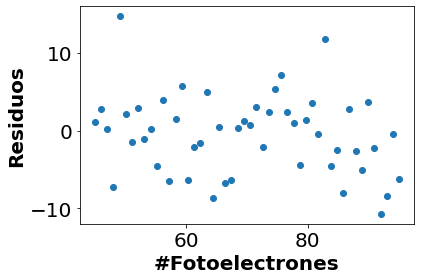

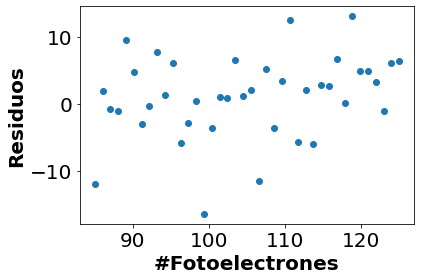

In [22]:
chi2_e = 0.
residuos_e = []
tmp_e = 0.
for i in range(45, 95):
    tmp_e = (funcion(i, popt[0], popt[1], popt[2]) - dataall90x210[i])
    chi2_e += (tmp_e*tmp_e)/np.sqrt(dataall90x210[i])
    residuos_e.append(tmp_e/np.sqrt(np.sqrt(dataall90x210[i])))
    
chi2_m = 0.
residuos_m = []
tmp_m = 0.
for i in range(85, 125):
    tmp_m = (funcion(i, popt2[0], popt2[1], popt2[2]) - dataall90x210[i])
    chi2_m += (tmp_m*tmp_m)/np.sqrt(dataall90x210[i])
    residuos_m.append(tmp_m/np.sqrt(np.sqrt(dataall90x210[i])))
    
print("Para compenente electromagnetica")
print("Chi2 = ", chi2_e)
print("Chi2/ndf =", chi2_e/(len(dataall90x210[45:95])-3))

chi2_eP= "{0:.2f}".format(chi2_e)
chi2_endfP= "{0:.2f}".format(chi2_e/(len(dataall90x210[45:95])-3))

print("")
print("")

print("Para compenente muonica")
print("Chi2 = ", chi2_m)
print("Chi2/ndf =", chi2_m/(len(dataall90x210[85:125])-3))

chi2_mP= "{0:.2f}".format(chi2_m)
chi2_mndfP= "{0:.2f}".format(chi2_m/(len(dataall90x210[85:125])-3))

#Graficas

plt.plot(x2, residuos_e, "o")
plt.ylabel("Residuos", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.show()


plt.plot(x3, residuos_m, "o")
plt.ylabel("Residuos", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.show()

# Prom/MAX

En la siguiente casilla calculamos el promedio de los primeros 20 bines:

1) Se realiza una lista de los primero 20 bines y se grafica

2) Se suman los primeros 20 bines

3) Esa suma se divide entre 20, para saber su promedio

4) Una vez teniendo el promedio lo dividimos entre el MAXIMO del eje Y, obteniendo así el coeficiente Prom/MAX

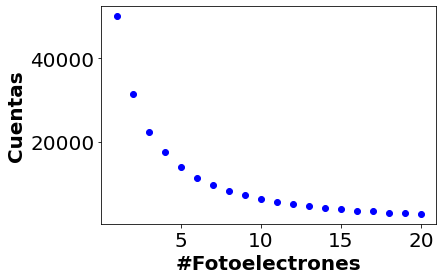

Lista de los primeros 20 datos
[50124. 31341. 22437. 17546. 13930. 11223.  9647.  8173.  7167.  6366.
  5545.  5155.  4515.  4099.  3850.  3469.  3299.  2976.  2884.  2671.]

Suma resultante de los primero 20 datos: 216417.000000

Promedio tanque Prueba o Referencia H=90,D=210: 10820.850000

Tanque Prueba H=90,D=210 Promedio/Maximo: 10.558349


In [23]:
plt.plot(x[1:21], dataall90x210[1:21], "ob") 

plt.ylabel("Cuentas", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.show()
#plt.savefig("promediotanquegeneral.jpg", dpi=300, bbox_inches='tight')
print("Lista de los primeros 20 datos")
print(dataall90x210[1:21])
suma=0
for i in range(20):
#    print(dataall90x210[i+1])
    suma += dataall90x210[i+1]

print("")
print("Suma resultante de los primero 20 datos: %f"%(suma))
print("")

prom90x210=suma/20
print("Promedio tanque Prueba o Referencia H=90,D=210: %f"%(prom90x210))
print("")

#Donde corresponde al punto maximo para el eje Y=1024.861940
#En caso de ser le eje X, este punto maximo se encuentra en X=104.236927

PromMax90x210 = prom90x210/1024.861940
print("Tanque Prueba H=90,D=210 Promedio/Maximo: %f"%(PromMax90x210))

#### A continuación se realiza hallar el error del promedio:

\begin{equation}
Desv = \sqrt{\frac{ \sum_{n=1}^{n}{ (x_i - x_{prom})^2 } } {n-1}}
\end{equation}

\begin{equation}
ErrStd = \frac{Desv}{\sqrt{n}} 
\end{equation}



In [24]:
sumatoria2=0
n=20

for i in range(n):
    a2 = dataall90x210[i+1]-prom90x210
    sumatoria2 += (a2*a2)

desv = np.sqrt(sumatoria2/n-1)

print("Desviación =", desv)

errstd = desv/np.sqrt(n)

print("Error =", errstd)


print("")
print("")
print("Promedio =",prom90x210 , "+/-", errstd)
print("")
print("")

Desviación = 11602.693761687415
Error = 2594.44119732458


Promedio = 10820.85 +/- 2594.44119732458




\begin{equation}
Promedio/Qmuon =\frac{Promedio}{Q_{muon}}
\end{equation}

\begin{equation}
\partial{Promedio/Qmuon} = \sqrt{ \left( \frac{1}{Qmuon}ErrStd) \right)^2 + \left( \frac{Promedio}{Qmuon^2}Err(Qmuon) \right)^2 }
\end{equation}

In [25]:
xp = 1./(Q_muon) * errstd
yp = prom90x210/(Q_muon*Q_muon) * Qerr_muon

print("")
print("")
print("Promedio/Q_Muon =", prom90x210/Q_muon, "+/-", np.sqrt(xp*xp + yp*yp))
print("")
print("")



Promedio/Q_Muon = 103.8101396502138 +/- 57.81908645548798




#### A continuacion la grafica del histograma de carga con el ajuste

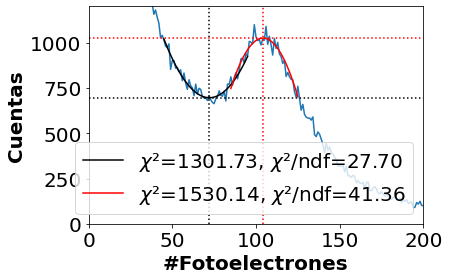

In [26]:
plt.plot(x, dataall90x210[0:501]) 
plt.plot(x2, funcion(x4, *popt),  "k-", ms=10, label=r"$\chi$²={}, $\chi$²/ndf={}".format(chi2_eP, chi2_endfP))
plt.plot(x3, funcion(x5, *popt2), "r-", ms=10, label=r"$\chi$²={}, $\chi$²/ndf={}".format(chi2_mP, chi2_mndfP))
plt.axvline(72.184782, color='k', ls="dotted")
plt.axhline(695.872440, color='k', ls="dotted")
plt.axvline(104.236927, color='r', ls="dotted")
plt.axhline(1024.861940, color='r', ls="dotted")
plt.xlim(0,200)
plt.ylim(0,1200)
plt.ylabel("Cuentas", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.legend()
#plt.grid()
plt.savefig("TanqueGeneral_90x210_VEM.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### Para saber el Maximo y Minimo para la función se aplico lo siguiente: 

Nota: Para evitar error en vez de ser usada la variable "x", se utilizo para "z"

In [27]:
f = popt[0]*pow(z,2)+popt[1]*z+popt[2]
f2 = popt2[0]*pow(z,2)+popt2[1]*z+popt2[2]

def maxminf(f):
    df = diff(f, z) # Primera derivada
    d2f = diff(f, z, 2) # Segunda derivada
    pcs = solve(Eq(df,0)) # Puntos críticos
    #print(pcs)
    for i in pcs:
        if d2f.subs(z,i)>0: 
            tipo="Min"
            y=f.subs(z,i)
        elif d2f.subs(z,i)<0: 
            tipo="Max"
            y=f.subs(z,i)
        else: 
            tipo="Indefinido"
        print("x = %f , y = %f (%s)"%(i,y,tipo))

maxminf(f)
maxminf(f2)

x = 72.184782 , y = 695.872440 (Min)
x = 104.236927 , y = 1024.861940 (Max)
